<a href="https://colab.research.google.com/github/protogia/govdata/blob/main/govadata_client_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is a try to analyze the opendata-sources of Braunschweig. It uses an python-based govdata-client to extract some informations from the provided metdata

First install the *govdata-client*

In [ ]:
!pip install govdata

Now import and initialize an **DKANPortalClient** for your city of interest. Test if your cityclient can establish a connection!

In [2]:
from govdata import DKANPortalClient

cityclient = DKANPortalClient(city="braunschweig", apiversion=3)

In [3]:
cityclient.connectiontest()

True

List available packages for your city. A package represents a topic like *infrastructure*, *traffic*, etc.

In [ ]:
cityclient.get_packages()

To take a look at metadata from a specific packaged provide the target-packagename. In this example I choose just the first package from the list. That way you can view details if you want to.

In [105]:
first_packagename = cityclient.get_packages()[0]
cityclient.get_package_metadata(package_name=first_packagename)

{'id': '1b400a05-7ca5-4dbb-bb3c-c05e97b745d0',
 'name': 'verzeichnungsdaten-sterbefälle-1876',
 'title': 'Verzeichnungsdaten Sterbefälle 1876',
 'author': 'Stadt Braunschweig',
 'author_email': 'stadtarchiv@braunschweig.de',
 'maintainer': 'Braunschweig',
 'maintainer_email': 'noreply@stadt-koeln.de',
 'license_title': 'http://creativecommons.org/licenses/by/4.0/',
 'license_id': 'cc-by/4.0',
 'notes': '<p>Der Datensatz enthält die Namen der im Jahr 1876 im Bereich des Standesamtes der Stadt Braunschweig verstorbenen Personen. Außerdem ist jeweils die Nummer des Eintrages in den Standesamtsregistern der Stadt Braunschweig genannt.</p>\n',
 'url': 'https://opendata.braunschweig.de/dataset/verzeichnungsdaten-sterbef%C3%A4lle-1876',
 'state': 'Active',
 'private': True,
 'revision_timestamp': '2023-02-22T16:03:37+01:00',
 'metadata_created': '2022-11-09 07:37:22',
 'metadata_modified': '2022-11-09 07:37:22',
 'creator_user_id': '69cb4099-b802-4f49-8d40-72a7d121497e',
 'type': 'Dataset',
 

But for an overview its easier to fetch the packagenames and the according metadata as one list. Store the data into a pandas.DataFrame() for easier dataprocessing and view the columns to get familiar with

In [106]:
total = cityclient.get_total_packages_with_resources()

import pandas as pd
df = pd.DataFrame(total)
df["metadata_created"] = pd.to_datetime(df["metadata_created"])
df.columns

Index(['id', 'name', 'title', 'author', 'author_email', 'maintainer',
       'maintainer_email', 'license_title', 'license_id', 'notes', 'url',
       'state', 'log_message', 'private', 'revision_timestamp',
       'metadata_created', 'metadata_modified', 'creator_user_id', 'type',
       'resources', 'tags', 'groups'],
      dtype='object')

First, I'm interested into the publisher-frequency of Braunschweig. I group the packages into monthly intervals:

<ipython-input-107-eb8eb16cfbcd>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_grouped = df.groupby(pd.Grouper(key="metadata_created", freq="M")).sum()


<Axes: xlabel='metadata_created'>

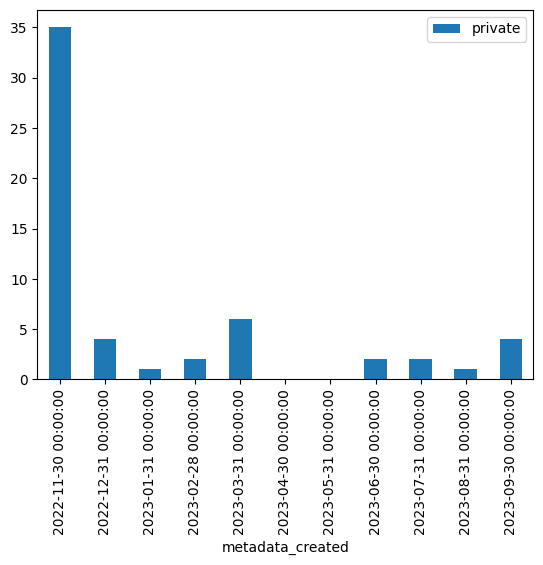

In [107]:
monthly_grouped = df.groupby(pd.Grouper(key="metadata_created", freq="M")).sum()
monthly_grouped.plot(kind="bar")

As you see, it seems when Braunschweig started the project, they launched the most packages. Within 2023 there were 3-5 packages per month.

Now I want to get more information about tag-diversity and how many authors and maintainers are working for this project.

In [112]:
df.author.unique()

array(['Stadt Braunschweig', 'Stadt Braunsschweig',
       'Deutsche Zentrum für Luft- und Raumfahrt e. V. (DLR)'],
      dtype=object)

In [113]:
df.maintainer.unique()

array(['Braunschweig'], dtype=object)

<Axes: xlabel='name'>

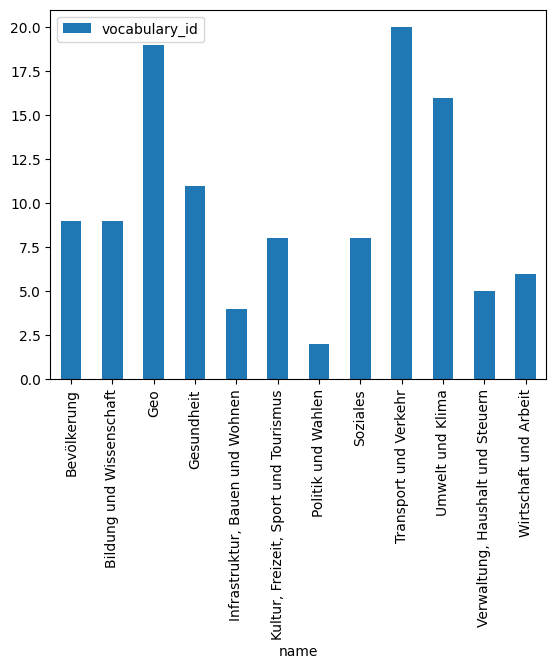

In [133]:
taglist = []
for entry in df.tags:
  for tag in entry:
    taglist.append(tag)

taglist = pd.DataFrame(taglist).drop(["id"], axis=1)
tag_grouped = taglist.groupby(by=["name"]).count()

tag_grouped.plot(kind="bar")